# Task : To predict total sales on the basis of advertising chanels.

In this task we need to predict the sales of product on the basis of it advertisement methods and ways like radio, TV and newspaper.

* The target variable is sales.

#### Importing various libraries necessary for this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv('./Downloads/Advertising.csv')

In [3]:
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### We need to check the dimension, description and pressence of null values in dataset

In [4]:
sales.shape

(200, 5)

In [5]:
sales.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

From the above we get to know that :
* dataset has 200 rows and 5 columns
* description of the dataset is giving the mean, max value, min value, etc of each column of the dataset.
* we get to know that there is no null value present in the dataset.

#### EDA
1. Unnamed: 0

In [7]:
sales['Unnamed: 0'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

By looking at the data of above column we can conclude that it is a sort of index present in the column and it will not affect the sales in anyway. This conclusion was reached on the basis of common sense and this column can be dropped without wasting anytime.

2. TV

In [8]:
sales['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

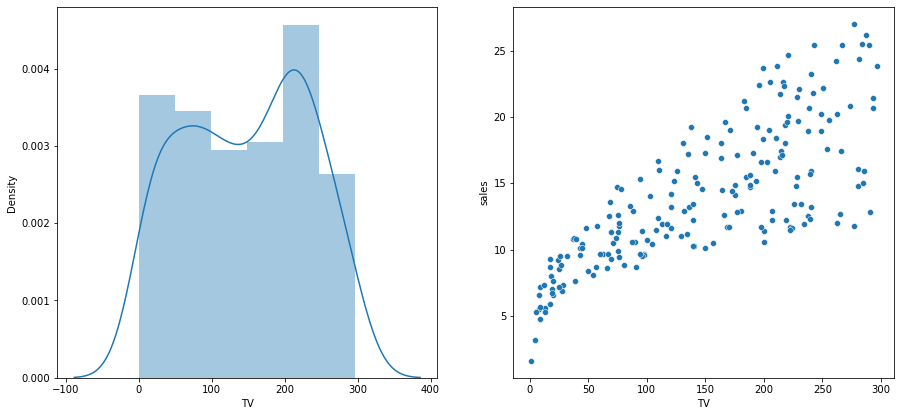

In [9]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(sales['TV'])
plt.xlabel('TV')
plt.subplot(222)
sns.scatterplot(x= 'TV', y= 'sales', data= sales)
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

By looking at both the graphs of TV we can conclude that it is difficult to determine the skewness of the data with data having the highest density between 200 and 230 from the distplot and from the scatterplot we can conclude that data is showing positive correlation with target variable by showing us that in the graph while increasing the data is looking more scattered than the beginning giving the shape reverse distorted cone.

3. radio

In [10]:
sales['radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

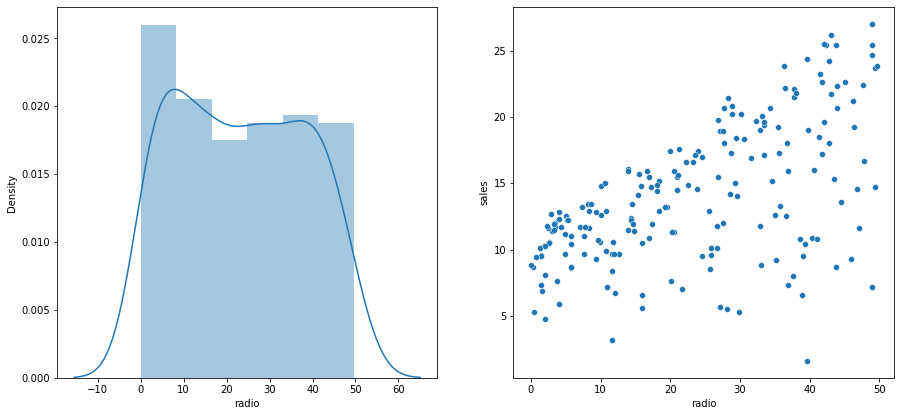

In [11]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(sales['radio'])
plt.xlabel('radio')
plt.subplot(222)
sns.scatterplot(x= 'radio', y= 'sales', data= sales)
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()

By looking at both the graphs of radio we can conclude that we cannot determine the skewness of the data and it is having the highest density between 0 and 5 from the distplot and from the scatterplot we can conclude that data is showing positive correlation with target column but data is scattered around from beginning to the end.

4. newspaper

In [12]:
sales['newspaper'].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

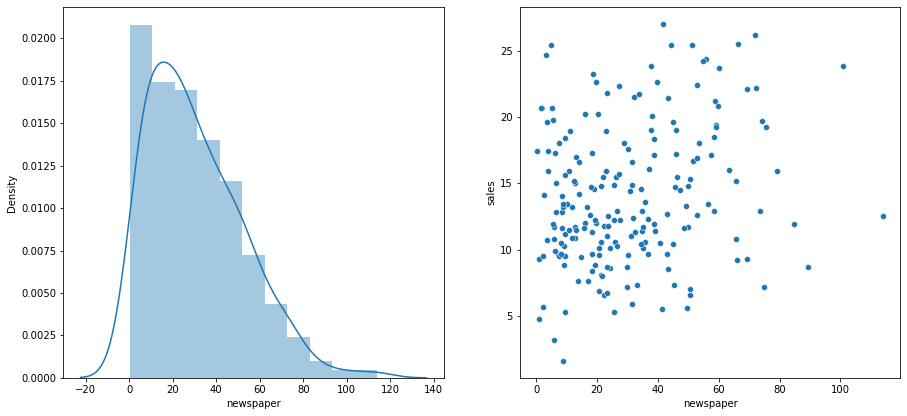

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(sales['newspaper'])
plt.xlabel('newspaper')
plt.subplot(222)
sns.scatterplot(x= 'newspaper', y= 'sales', data= sales)
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

By looking at both the graphs of newspaper we can conclude that data is positively skewed with having the highest density between 0 and 7 from the distplot and from the scatterplot we can conclude that the data is showing a little bit of positive correlation with the target column but it is scattered all over the place.

#### Now creating the heatmap for correlation before dropping the unnecessary columns.

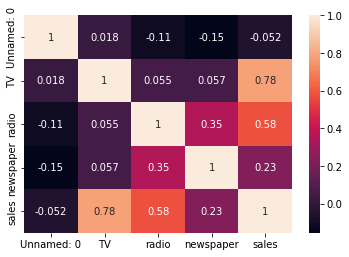

In [14]:
sns.heatmap(sales.corr(), annot= True)
plt.show()

Heatmap is showing that target column (sales) is having high positive correlation with all the three ways of advertising (TV, radio, newspaper).

#### Now dropping the column.

In [15]:
sales.drop(['Unnamed: 0'], axis= 1, inplace= True)

#### Spliting the data into test and train set.

In [16]:
X = sales.drop(['sales'], axis= 1)
y = sales['sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

#### Now applying the GridSearchCV to find the best suitable model and for the Hyper parameter tuning.

1. Linear Regression

In [18]:
lr = LinearRegression()

In [19]:
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [20]:
lrf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]}, scoring='r2')

In [21]:
lrf.best_params_

{'n_jobs': 1}

In [22]:
lrf.score(X_train, y_train)

0.89152823018429

2. Decision Tree Regression

In [23]:
dt = DecisionTreeRegressor()

In [24]:
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [25]:
dtf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [26]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [27]:
dtf.score(X_train, y_train)

0.9862967646761532

3. Random Forest Regression

In [28]:
rf = RandomForestRegressor()

In [29]:
rff = GridSearchCV(rf, param_grid= {'n_estimators': [100,110,120,130,140], 'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [30]:
rff.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 110, 120, 130, 140]},
             scoring='r2')

In [31]:
rff.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 110}

In [32]:
rff.score(X_train, y_train)

0.9915435653303571

4. Bagging Regression

In [33]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth= 5, min_samples_split= 2, min_samples_leaf= 1))

In [34]:
brf = GridSearchCV(br, param_grid= {'n_estimators': [10,20,30,40,50], 'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)

In [35]:
brf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5)),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [36]:
brf.best_params_

{'max_features': 3, 'max_samples': 5, 'n_estimators': 50}

In [37]:
brf.score(X_train, y_train)

0.6889141893919122

So by applying GridSearchCV on each model we reach to the conclusion that best suitable model for this dataset is Random Forest Regression model.

#### Now applying scaling to remove the outliers from the dataset.

In [38]:
scaler = StandardScaler()

In [39]:
scaledX_train = scaler.fit_transform(X_train)

In [40]:
scaledX_test = scaler.transform(X_test)

In [41]:
rf = RandomForestRegressor(max_depth= 5, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 110)

In [42]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

In [43]:
prediction = pd.DataFrame({'Actual': y_test, 'Prediction': np.round(pred, 1)})

In [44]:
prediction.head()

,Actual,Prediction
126,6.6,6.4
104,20.7,20.1
99,17.2,17.2
92,19.4,19.3
111,21.8,22.2


#### Now applying various metrics to check the accuracy of the model.

In [45]:
print('r2_score : ', metrics.r2_score(pred, y_test))

r2_score :  0.9797345383598305


In [46]:
print('root mean square error : ', np.sqrt(metrics.mean_squared_error(pred, y_test)))

root mean square error :  0.6154805142547621


In [47]:
print('mean absolute error : ', metrics.mean_absolute_error(pred, y_test))

mean absolute error :  0.4661780264933582


#### By looking at the above three metrics we can observe that this model has high accuracy for this dataset. The evidence is there in the form of r2_score is very high. Now we need to save the model for further use.

In [48]:
import pickle

In [49]:
advertisement_model = pickle.dumps(rf)

#### Hence we have made the prediction on the dataset and have saved the model. So, we have achieved the objective of the task and it has been completed.